<a href="https://colab.research.google.com/github/dilrubashowkat/MLearn/blob/master/June1_19_US_EducationData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras

In [0]:
import tensorflow as mtf


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dilrubashowkat","key":"a659da971deef98ccd554095d92d3b98"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

In [0]:
!kaggle datasets download -d noriuk/us-education-datasets-unification-project

#select the "Copy API command" in Keggle data download option

In [0]:
!unzip us-education-datasets-unification-project.zip

In [9]:
ls

aggregates.zip           sample_data/
elsect.zip               sanity_check.txt
enroll_sanity_check.txt  states_all.csv
kaggle.json              states_all_extended.csv
nces_enroll.zip          us-education-datasets-unification-project.zip
NDE.zip


In [0]:
# Importing modules
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os, random, cv2
#from matplotlib import style
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#matplotlib inline
# Let's check the labels


In [0]:
df= pd.read_csv("states_all.csv")
df.describe()

In [0]:
df.head()

In [0]:
!pip install -U scikit-learn


In [0]:
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_val_score



In [0]:
#https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset
df.isna().sum()*100/df.shape[0]


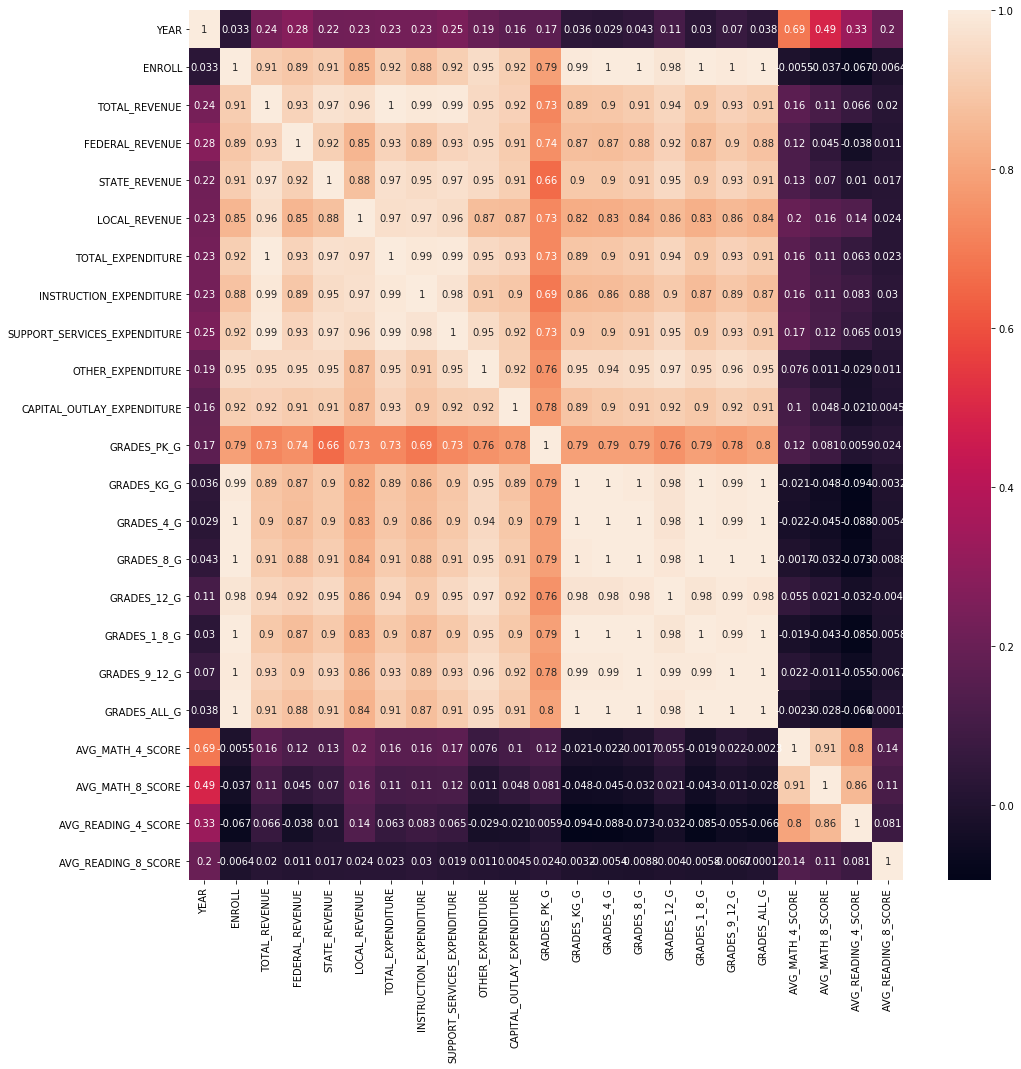

In [16]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)





In [0]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.violinplot(x="TOTAL_REVENUE", y="STATE", data=df)


In [20]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [0]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.violinplot(x="TOTAL_EXPENDITURE", y="STATE", data=df)


In [0]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.violinplot(x="GRADES_ALL_G", y="STATE", data=df)


In [0]:
df['average_reveneue']=df['TOTAL_REVENUE']/df['GRADES_ALL_G']
df['average_expenditure']=df['TOTAL_EXPENDITURE']/df['GRADES_ALL_G']


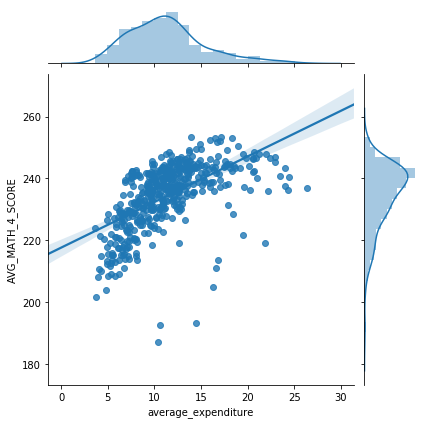

In [28]:
sns.jointplot("average_expenditure", "AVG_MATH_4_SCORE", data=df, kind="reg")
